In [1]:
#importing library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Principal Component Analysis to reduce the feature column to visualize the data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
#loading the data
#here delimiter is semicolon
df=pd.read_csv('../input/divorce-prediction/divorce_data.csv',delimiter=';')
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [3]:
#to show all the columns in the dataset
pd.set_option('max_columns',None)

In [4]:
#checking the null values in the dataset
df.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

# Training a model

In [5]:
#spliting the data
y=df['Divorce'].copy()
x=df.drop('Divorce',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)

In [6]:
x_train.shape
x_test.shape

(52, 54)

In [7]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)
#checking accurary score
model.score(x_test,y_test)

0.9615384615384616

n#  Using PCa for Dimensionaliy Reduction

In [12]:
n_components=54
pca=PCA(n_components=n_components)
pca.fit(x_train)
x_train_reduced=pd.DataFrame(pca.transform(x_train),index=x_train.index,columns=['PC'+str(i) for  i in range(1,n_components+1)])
x_test_reduced=pd.DataFrame(pca.transform(x_test),index=x_test.index,columns=['PC'+str(i) for  i in range(1,n_components+1)])

In [13]:
#training the model
model=LogisticRegression()
model.fit(x_train_reduced,y_train)
#checking accurary score
model.score(x_test_reduced,y_test)

0.9615384615384616

In [22]:
n_components=2
pca=PCA(n_components=n_components)
pca.fit(x_train)
x_train_two_dimension=pd.DataFrame(pca.transform(x_train),index=x_train.index,columns=['PC1','PC2'])
x_test_two_dimension=pd.DataFrame(pca.transform(x_test),index=x_test.index,columns=['PC1','PC2'])

In [16]:
#training the model
model=LogisticRegression()
model.fit(x_train_two_dimension,y_train)
#checking accurary score
model.score(x_test_two_dimension,y_test)

0.9615384615384616

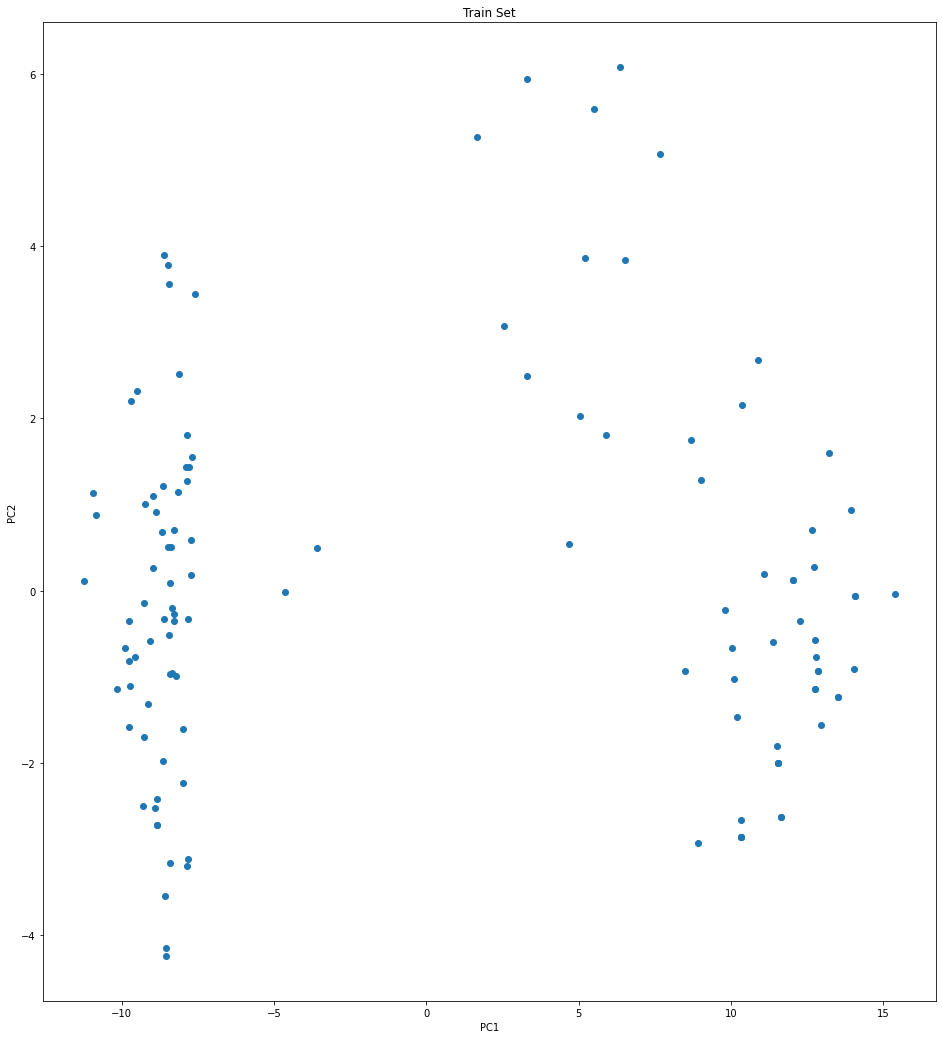

In [19]:
plt.figure(figsize=(16,18))
plt.scatter(x_train_two_dimension['PC1'],x_train_two_dimension['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train Set')
plt.show()

In [ ]:
plt.figure(figsize=(16,18))
plt.scatter(x_train_two_dimension['PC1'],x_train_two_dimension['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train Set')
plt.show()

In [27]:
y_train==0

12     False
150     True
149     True
28     False
156     True
       ...  
133     True
137     True
72     False
140     True
37     False
Name: Divorce, Length: 118, dtype: bool

In [39]:
x_train_two_dimension.loc[y_train==1,:]

,PC1,PC2
12,14.066466,-0.065186
28,12.748873,-1.135939
17,13.956344,0.935122
13,14.066466,-0.065186
45,11.522644,-1.799088
73,8.684036,1.754957
36,12.254247,-0.347380
21,13.506796,-1.236457
2,2.534115,3.078849
70,9.808942,-0.225420


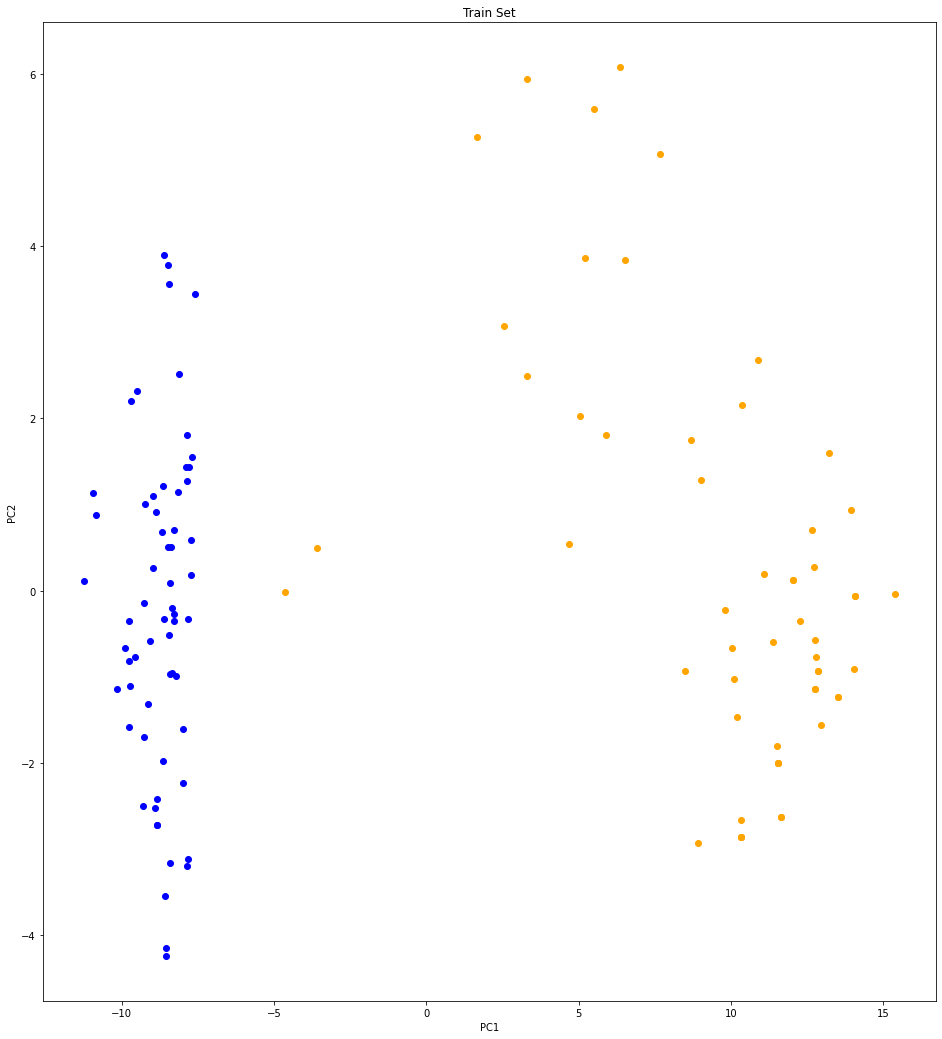

In [41]:
plt.figure(figsize=(16,18))
plt.scatter(x_train_two_dimension.loc[y_train==0,'PC1'],x_train_two_dimension.loc[y_train==0,'PC2'],label='Married',color='blue')
plt.scatter(x_train_two_dimension.loc[y_train==1,'PC1'],x_train_two_dimension.loc[y_train==1,'PC2'],label='Unmarried',color='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train Set')
plt.show()